## Plotting Mujoco Data


In [1]:
import mujoco
import mediapy as media
import numpy
import matplotlib.pyplot as plt
import math

In [2]:
xml = '''
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="sphere">
      <freejoint/>
      <geom pos="0 0 1" size="1" rgba="1 0 0 1"/>
    </body>    
  </worldbody>
</mujoco>
'''

In [3]:
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

duration = 5  # (seconds)
framerate = 30

frames = []
# mujoco.mj_resetData(model, data)

t = []
x = []
v = []
while data.time < duration:
    mujoco.mj_step(model, data)
    t.append(data.time)
    x.append(data.qpos.copy())
    v.append(data.qvel.copy())
    
    if len(frames) < data.time * framerate:
        renderer.update_scene(data)
        pixels = renderer.render()
        frames.append(pixels)

media.show_video(frames, fps=framerate)

t = numpy.array(t)
x = numpy.array(x)
v = numpy.array(v)


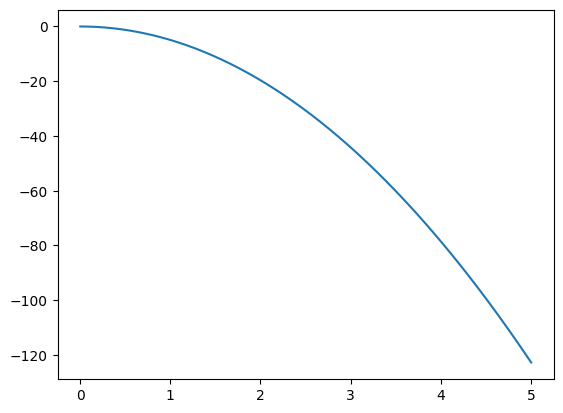

In [4]:
plt.plot(t,x[:,2])

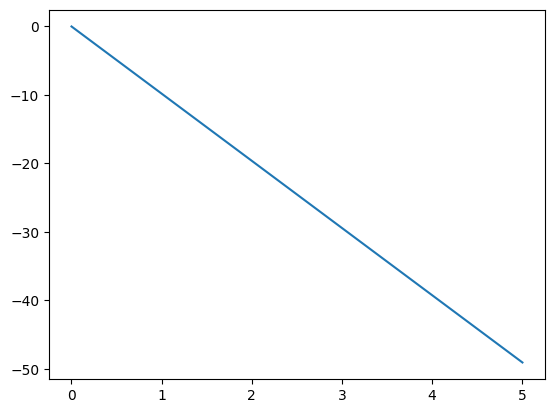

In [5]:
plt.plot(t,v[:,2])

In [6]:
xml = '''
<mujoco>
  <worldbody>
    <light pos="0 0 10"/>
    <body quat="1 0 0 0">
      <joint type="free"/>
      <geom type="box" size=".5 .5 .5" density="1" pos="0 0 0" rgba="1 0 0 1"/>
      <!--
      <inertial pos="0 0 0" mass="1" diaginertia="1 1 1" />
      -->
    </body>
  </worldbody>
</mujoco>
'''


In [7]:
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

duration = 5  # (seconds)
framerate =30

frames = []
# mujoco.mj_resetData(model, data)
data.qpos = numpy.array([0,0,0,1,0,0,0])

t = math.pi*30/180
ct = math.cos(t/2)
st = math.sin(t/2)
a = ct*2*math.pi
bcd = 2*math.pi
b = bcd*1
c = bcd*0
d = bcd*0

data.qvel = numpy.array([0,0,0,2*math.pi,0,0])

t = []
x = []
v = []
while data.time < duration:
    mujoco.mj_step(model, data)
    t.append(data.time)
    x.append(data.qpos.copy())
    v.append(data.qvel.copy())
    if len(frames) < data.time * framerate:
        renderer.update_scene(data)
        pixels = renderer.render()
        frames.append(pixels)
        

In [8]:
media.show_video(frames, fps=framerate)

In [9]:
t = numpy.array(t)
x = numpy.array(x)
v = numpy.array(v)

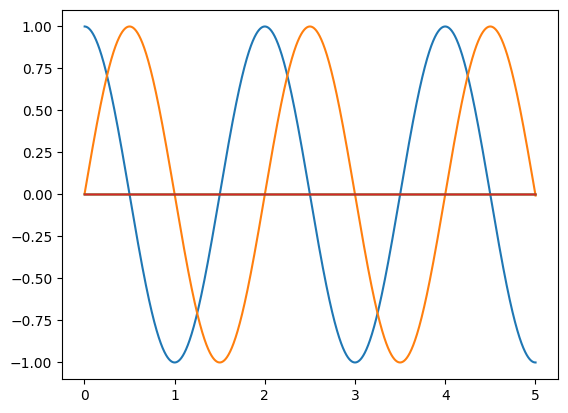

In [10]:
plt.plot(t,x[:,3:])

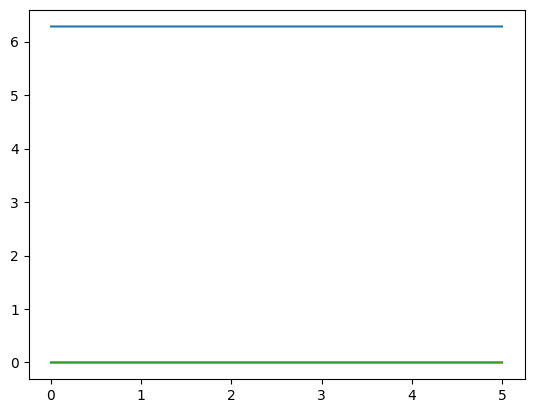

In [11]:
plt.plot(t,v[:,3:])